## Load DLC tracking files

Some packages are required for this to run smoothly (try `pip install` PACKAGE_NAME ). 
Specifically:
- numpy (general)
- pandas (the most awesome python package in history - I load the h5 file with this)
- matplotlib (for plotting)
- seaborn (just to make figures look nicer)
- pickle (I think it is pre-installed though)
- easydict

In [15]:
import sys, os
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

### Pickle file

This is all the metadata ... here is how to load it

In [20]:
pickle_file = '/Volumes/sampledata/dlc/jorgen/2020_08/tracking_file_0001_trackingVideoDLC_resnet50_mouse_openfieldJun30shuffle1_1030000_meta.pickle'

In [21]:
with open(pickle_file, 'rb') as f: #same as in SaveData!
    metadata = pickle.load(f)

In [22]:
metadata

{'data': {'start': 1597401269.3371964,
  'stop': 1597401649.423319,
  'run_duration': 380.08612275123596,
  'Scorer': 'DLC_resnet50_mouse_openfieldJun30shuffle1_1030000',
  'DLC-model-config file': {'stride': 8.0,
   'weigh_part_predictions': False,
   'weigh_negatives': False,
   'fg_fraction': 0.25,
   'mean_pixel': [123.68, 116.779, 103.939],
   'shuffle': True,
   'snapshot_prefix': 'N:\\emiliera\\LEC_Time\\dlc\\mouse_openfield-jorgensu-2020-06-30\\dlc-models\\iteration-2\\mouse_openfieldJun30-trainset95shuffle1\\test\\snapshot',
   'log_dir': 'log',
   'global_scale': 0.8,
   'location_refinement': True,
   'locref_stdev': 7.2801,
   'locref_loss_weight': 1.0,
   'locref_huber_loss': True,
   'optimizer': 'sgd',
   'intermediate_supervision': False,
   'intermediate_supervision_layer': 12,
   'regularize': False,
   'weight_decay': 0.0001,
   'mirror': False,
   'crop_pad': 0,
   'scoremap_dir': 'test',
   'batch_size': 8,
   'dataset_type': 'default',
   'deterministic': False,
 

### h5 file

In [23]:
h5_file = '/Volumes/sampledata/dlc/jorgen/2020_08/tracking_file_0001_trackingVideoDLC_resnet50_mouse_openfieldJun30shuffle1_1030000.h5'
try:
    Dataframe = pd.read_hdf(h5_file)

except FileNotFoundError:
    print("Data was not found.")

I load it with pandas. It is very neat because now you have it all in a nice so called "dataframe". That allows you to do some nice indexing and most importantly display everything nicely. If you call `.head()` on a dataframe you see the top of the data. If you want to see the end of the data type `.tail()`

In [25]:
Dataframe.head()

scorer    DLC_resnet50_mouse_openfieldJun30shuffle1_1030000             \
bodyparts                                  top_right_corner              
coords                                                    x          y   
0                                                547.361694  31.970592   
1                                                 10.566724  55.034832   
2                                                547.138916  34.065487   
3                                                 10.434278  54.765640   
4                                                 10.118413  55.095104   

scorer                                                                         \
bodyparts            top_left_corner                       bottom_left_corner   
coords    likelihood               x          y likelihood                  x   
0           0.027300       21.604721  44.229858        1.0          38.942516   
1           0.000856       21.356777  45.401554        1.0          39.917320   
2           0.001188       21.123863  44.735458        1.0          39.001053   
3           0.001187       20.524736  45.546520        1.0          39.556847   
4           0.000909       21.399706  44.476467        1.0          39.166225   

scorer                                                ...             \
bodyparts                        bottom_right_corner  ...  right_ear   
coords              y likelihood                   x  ... likelihood   
0          564.973022        1.0          577.054749  ...        1.0   
1          566.519409        1.0          577.760498  ...        1.0   
2          566.353638        1.0          576.284973  ...        1.0   
3          565.530334        1.0          577.204956  ...        1.0   
4          565.758850        1.0          575.851562  ...        1.0   

scorer                                                               \
bodyparts   tail_base                          nose_tip               
coords              x          y likelihood           x           y   
0          526.840088  70.214371        1.0  480.413910  117.124802   
1          527.424805  70.801750        1.0  476.825165  115.304253   
2          527.845581  71.459221        1.0  479.442169  118.541428   
3          527.627869  71.081345        1.0  476.997772  118.530472   
4          528.017944  71.041466        1.0  477.166840  119.318024   

scorer                                                              
bodyparts            cue_card_bottom_center                         
coords    likelihood                      x           y likelihood  
0           0.318867             286.291382  591.652893   0.944149  
1           0.236164             285.240631  591.421631   0.186252  
2           0.259891             284.376343  593.456238   0.265511  
3           0.457552             279.228973  594.732178   0.627897  
4           0.347690             284.943542  590.940979   0.960402  

[5 rows x 27 columns]

However, the dataframe is a bit tricky to access since it has multiple "header" layers (see the bold column names that have multiple layers). But you can easily go down the hierarchy "dot by dot" ... see below

In [26]:
Dataframe.columns.levels

FrozenList([['DLC_resnet50_mouse_openfieldJun30shuffle1_1030000'], ['bottom_left_corner', 'bottom_right_corner', 'cue_card_bottom_center', 'left_ear', 'nose_tip', 'right_ear', 'tail_base', 'top_left_corner', 'top_right_corner'], ['likelihood', 'x', 'y']])

So you see there are different "levels" in this dataframe. The top level is just the name of the classifier (`DLC_resnet50_mouse_openfieldJun30shuffle1_1030000`), one level deeper is the body part list and then for each body part you have multiple attributes: `'likelihood', 'x', 'y'`. You can switch between those to access by adding "dots" in between each level ... 

In [42]:
Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.head()

bodyparts top_right_corner                       top_left_corner             \
coords                   x          y likelihood               x          y   
0               547.361694  31.970592   0.027300       21.604721  44.229858   
1                10.566724  55.034832   0.000856       21.356777  45.401554   
2               547.138916  34.065487   0.001188       21.123863  44.735458   
3                10.434278  54.765640   0.001187       20.524736  45.546520   
4                10.118413  55.095104   0.000909       21.399706  44.476467   

bodyparts            bottom_left_corner                         \
coords    likelihood                  x           y likelihood   
0                1.0          38.942516  564.973022        1.0   
1                1.0          39.917320  566.519409        1.0   
2                1.0          39.001053  566.353638        1.0   
3                1.0          39.556847  565.530334        1.0   
4                1.0          39.166225  565.758850        1.0   

bodyparts bottom_right_corner  ...  right_ear   tail_base             \
coords                      x  ... likelihood           x          y   
0                  577.054749  ...        1.0  526.840088  70.214371   
1                  577.760498  ...        1.0  527.424805  70.801750   
2                  576.284973  ...        1.0  527.845581  71.459221   
3                  577.204956  ...        1.0  527.627869  71.081345   
4                  575.851562  ...        1.0  528.017944  71.041466   

bodyparts               nose_tip                         \
coords    likelihood           x           y likelihood   
0                1.0  480.413910  117.124802   0.318867   
1                1.0  476.825165  115.304253   0.236164   
2                1.0  479.442169  118.541428   0.259891   
3                1.0  476.997772  118.530472   0.457552   
4                1.0  477.166840  119.318024   0.347690   

bodyparts cue_card_bottom_center                         
coords                         x           y likelihood  
0                     286.291382  591.652893   0.944149  
1                     285.240631  591.421631   0.186252  
2                     284.376343  593.456238   0.265511  
3                     279.228973  594.732178   0.627897  
4                     284.943542  590.940979   0.960402  

[5 rows x 27 columns]

Here is one sub-group (the tracking data for the bodypart "right_ear")

In [29]:
Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.right_ear.head()

coords,x,y,likelihood
0,490.055664,97.613403,1.0
1,489.716309,98.254822,1.0
2,488.441528,99.116280,1.0
3,488.626251,98.556038,1.0
4,488.229980,99.486504,1.0


Once you isolated those sublevels you can plot whatever ... 
Below I am creating a scatter plot of the `right_ear` x and y coordinate and the `left_ear` x and y coordinate

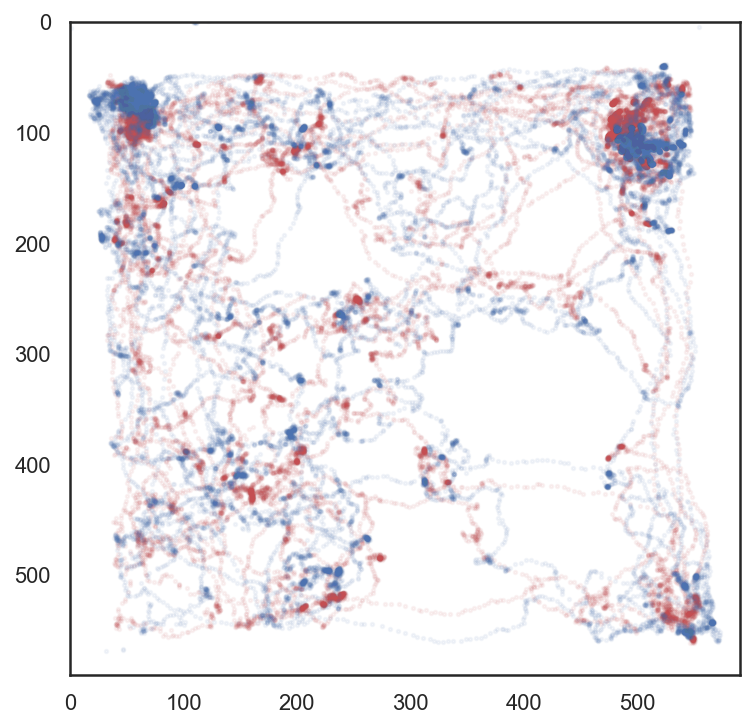

In [36]:
figure = plt.figure(figsize=(6,6))
ax = figure.add_subplot(111)
ax.scatter(Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.right_ear.x, Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.right_ear.y,s=3,alpha=.06,c='r')
ax.scatter(Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.left_ear.x, Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.left_ear.y,s=3,alpha=.06,c='b')

ax.set_xlim(0,590)
ax.set_ylim(0,590)
ax.invert_yaxis()

### Occupancy

For displaying occupancy you calculate a 2D histogram of the x-y-tracking data. Then you can smooth it. 
For smoothing I use a scipy package, so `pip install scipy` once! 

In [37]:
from scipy.ndimage.filters import gaussian_filter1d, gaussian_filter

In [38]:
bins_size = 10 # pixels
height, width = metadata['data']['frame_dimensions'] # This is the pickle metadata from above
smoothing_sigma = 2

In [39]:
x_pos = Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.right_ear.x
y_pos = Dataframe.DLC_resnet50_mouse_openfieldJun30shuffle1_1030000.right_ear.y

In [40]:
nbins_width  = int(width/bins_size)
nbins_height = int(height/bins_size)

if (nbins_width < 10) or (nbins_height < 10):
    raise ValueError('Less than 10 bins in map. That is not nice.')
    
# Extract range from tracking data 
range_ = [[0, height],\
          [0, width]]

histogram, yedges, xedges  = np.histogram2d(y_pos,\
                                            x_pos, bins=[nbins_height,nbins_width],range=range_)

histogram = np.array(histogram, dtype=float)
histogram_original = histogram

histogram = gaussian_filter(histogram, sigma=smoothing_sigma, mode='nearest')

# Mask the bins that have never been visited
masked_histogram = np.ma.masked_where(histogram_original==0, histogram)

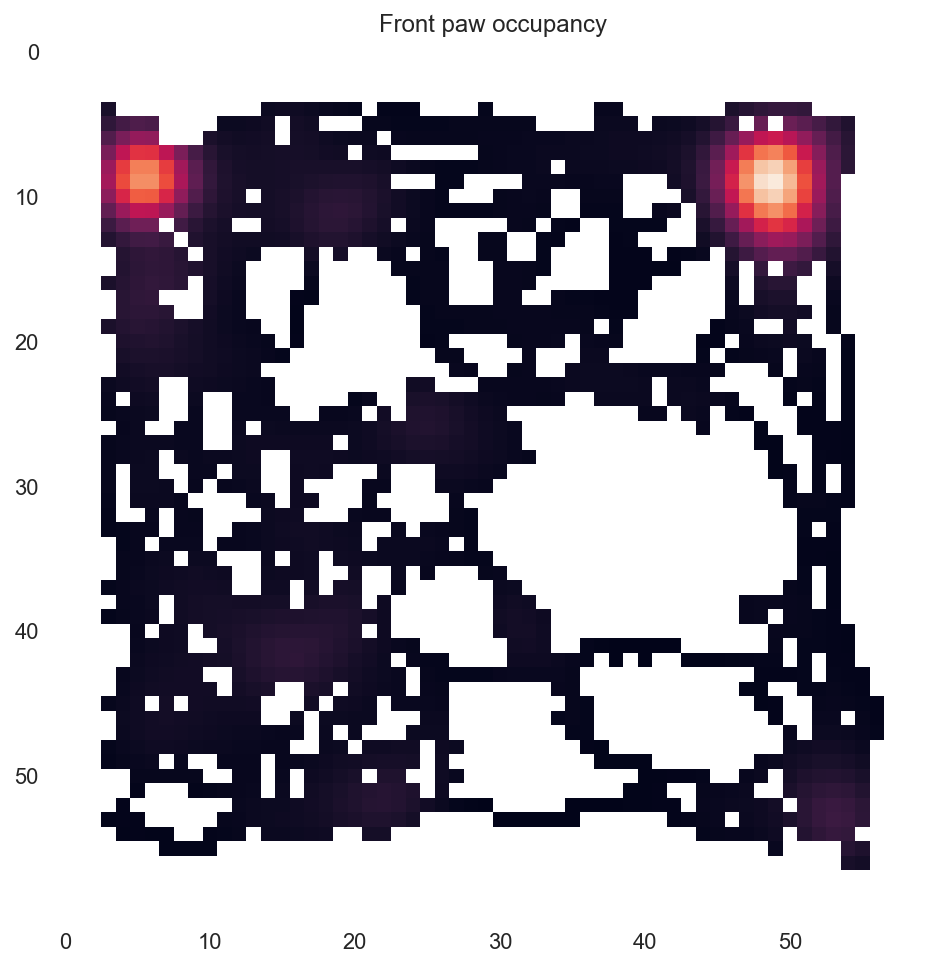

In [41]:
figure = plt.figure(figsize=(15,8))
plt.imshow(masked_histogram)
plt.title('Front paw occupancy')
sns.despine(left=True,bottom=True)